In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#Importing 
plasticDF = pd.read_csv("/Users/newowner/Desktop/data/badplasticmanage.csv")[["Entity","Share of plastic inadequately managed (%)"]]
povertyDF = pd.read_csv("/Users/newowner/Desktop/data/poverty.csv")[["Entity","Year","Share of the population living in extreme poverty (%)"]]
industDF = pd.read_csv("/Users/newowner/Desktop/data/data.csv")[["Country Name","Indicator","2010"]]
gdpDF = pd.read_csv("/Users/newowner/Desktop/data/gdp.csv")[["Country Name","2010"]]


#Cleaning Data 
povertyDF = povertyDF.loc[povertyDF["Year"] == 2010]
povertyDF = povertyDF.sort_values(by=["Entity"]) 
povertyDF = povertyDF.reset_index(drop=True)

plasticDF = plasticDF.sort_values(by=["Entity"])
plasticDF = plasticDF.reset_index(drop=True)

industDF = industDF.loc[industDF["Indicator"] == "Industrialization intensity index"]
industDF = industDF.reset_index(drop=True)


plasticDF["Share of the population living in extreme poverty (%)"] = 69

for i in povertyDF["Entity"]:
    if plasticDF['Entity'].str.contains(i).any():
        mergedDF = plasticDF
        mergedDF["Share of the population living in extreme poverty (%)"].iloc[(mergedDF[mergedDF.Entity == i].index[0])] = povertyDF["Share of the population living in extreme poverty (%)"].iloc[(povertyDF[povertyDF.Entity == i].index[0])]

merged2DF = plasticDF
mergedDF = mergedDF[plasticDF["Share of the population living in extreme poverty (%)"] != 69]

mergedIndustPlastic = pd.merge(left=industDF,right=plasticDF, left_on='Country Name', right_on='Entity')
    


 
mergedDF = mergedDF.reset_index(drop=True)


        

ParserError: Error tokenizing data. C error: Expected 3 fields in line 5, saw 65


In [5]:
mergedDF["ratio"] = mergedDF["Share of plastic inadequately managed (%)"]/mergedDF["Share of the population living in extreme poverty (%)"]

NameError: name 'mergedDF' is not defined

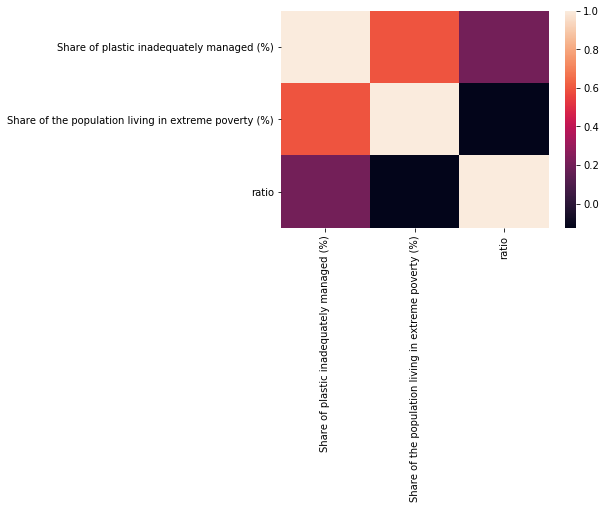

In [3]:
result = mergedDF.corr()
sns.heatmap(result)

In [ ]:
mergedDF

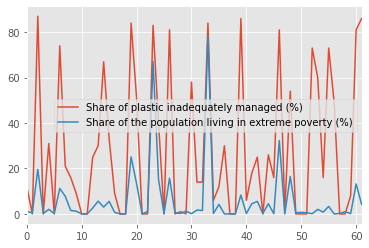

In [3]:
plt.style.use('ggplot')
mergedDF[["Entity","Share of plastic inadequately managed (%)","Share of the population living in extreme poverty (%)"]].plot()


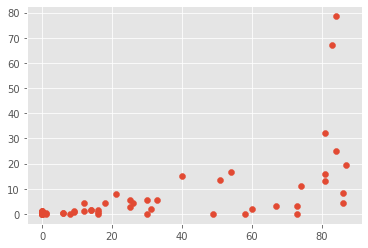

In [7]:
ax = plt.scatter(mergedDF["Share of plastic inadequately managed (%)"], y=mergedDF["Share of the population living in extreme poverty (%)"])

random = mergedDF[["Share of plastic inadequately managed (%)","Share of the population living in extreme poverty (%)"]].sample(n=7)

#plt.subplots(random["Share of plastic inadequately managed (%)"], random["Share of the population living in extreme poverty (%)"])

In [5]:
epicsauce = mergedDF[["Share of plastic inadequately managed (%)","Share of the population living in extreme poverty (%)"]]



x = mergedDF[["Share of plastic inadequately managed (%)"]]
kmeans = kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
correct = 0
for i in range(len(x)):
    predict_me = np.array(x.iloc[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    print(prediction[0])
    if prediction[0] == mergedDF[["Share of the population living in extreme poverty (%)"]].iloc[i]:
        correct += 1

0


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().